In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')
df

,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,China,1/22/20,1,0,0
1,China,1/22/20,14,0,0
2,China,1/22/20,6,0,0
3,China,1/22/20,1,0,0
4,China,1/22/20,0,0,0
...,...,...,...,...,...
24949,Iran,3/28/20,35408,2517,11679
24950,Italy,3/28/20,92472,10023,12384
24951,New Zealand,3/28/20,451,0,50
24952,Peru,3/28/20,671,16,16


In [3]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

dfDate = pd.DataFrame(df1)
dfDate

,0
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20
...,...
62,3/24/20
63,3/25/20
64,3/26/20
65,3/27/20


In [4]:
China = df[df["Country/Region"] == "China"]  
China
dChina = China.groupby("Last Update")
dChina = dChina.sum()
dChina
dChina = list(dChina["Confirmed"].values)
dChina.sort()
dChina

ChinaCases = pd.DataFrame({"China": dChina})

ChinaCases
ChinaCases = pd.concat([dfDate,ChinaCases], axis=1, sort = False)
ChinaCases
ChinaCases = ChinaCases.rename(columns={0: "Date"})
ChinaCases

,Date,China
0,1/22/20,547
1,1/23/20,639
2,1/24/20,916
3,1/25/20,1399
4,1/26/20,2062
...,...,...
62,3/24/20,79574
63,3/25/20,79588
64,3/26/20,79749
65,3/27/20,79771


In [5]:
FMT = '%m/%d/%y'
days = ChinaCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday
#ChinaCases['Date'] = days.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT)).days  )

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67]

In [6]:
import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

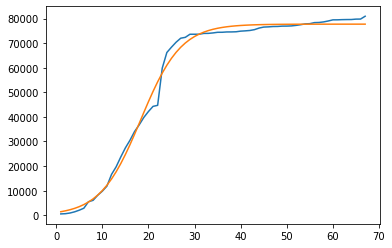

In [15]:
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
Day = numday
Cases = list(ChinaCases.iloc[:,1])

plt.plot(Day, Cases)

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

Pred = LogisticModel(Day,v,t,c)

plt.plot(Day, Pred)

In [16]:
print(v)
print(t)
print(c)

4.367235676437937
18.339713440933664
77707.934009508


In [29]:
import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

Day of Inflection: 2020-02-09 00:00:00


In [31]:
sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol
startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

End of the Infection: 2020-07-18 00:00:00


In [28]:
import numpy as np
def GompertzModel(x,a,b,c):
    return a*(np.exp(b*(np.exp(c*x))))

from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

Day = numday
Cases = list(ChinaCases.iloc[:,1])
fit2 = curve_fit(GompertzModel,Day,Cases, p0=[77000, -20, 2],)

params = fit2[0]

a = params[0]
b = params[1]
c = params[2]

print(a)
print(b)
print(c)
#Pred = LogisticModel(Day, *params)
#plt.plot(Day, Pred)
#plt.plot(Day, Cases)

77000.0
-20.0
2.0
